In [ ]:
import os
import cv2
import numpy as np

# Preprocessing function
def preprocess_image(img):
    # Resize to a fixed size (e.g., 224x224)
    img_resized = cv2.resize(img, (224, 224))

    # Convert the image to grayscale
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur for noise reduction
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Normalize the image pixel values
    norm_img = cv2.normalize(blur, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Enhance contrast using histogram equalization
    enhanced_img = cv2.equalizeHist(norm_img)

    # Apply random rotation for augmentation
    rows, cols = enhanced_img.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle=np.random.uniform(-10, 10), scale=1)
    rotated_img = cv2.warpAffine(enhanced_img, rotation_matrix, (cols, rows))

    #image segmentation
    

    return rotated_img

# Function to read images from subfolders, preprocess, and overwrite them
def process_images_in_place(input_dir):
    # Traverse the directory
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check for valid image extensions
                img_path = os.path.join(root, file)
                
                # Read the image
                img = cv2.imread(img_path)

                if img is not None:
                    # Preprocess the image
                    processed_img = preprocess_image(img)

                    # Overwrite the original image with the processed one
                    cv2.imwrite(img_path, processed_img)

                    print(f"Processed and replaced: {img_path}")

# Accept input path from user
input_dir = input("Enter the path to the image dataset: ")

# Check if the provided directory exists
if os.path.isdir(input_dir):
    # Process the images in place
    process_images_in_place(input_dir)
else:
    print(f"The directory {input_dir} does not exist. Please provide a valid path.")


Please enter the path to your image:  _4_1244424.jpg


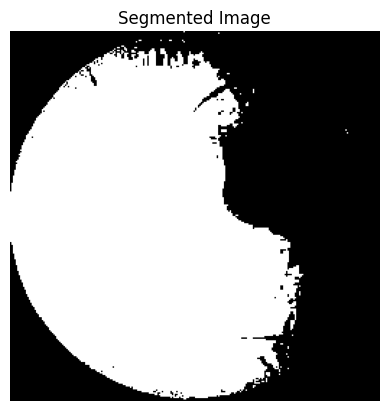

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Take the input image path from the user
image_path = input("Please enter the path to your image: ")

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding (128 is the threshold, and 255 is the max value for pixels above the threshold)
    _, segmented_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Display the segmented image using matplotlib
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.axis('off')  # Hide the axes
    plt.show()


In [3]:
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the VGG16 model pre-trained on ImageNet without the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Create a new model that outputs the features from the 'block5_pool' layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Take the input image path from the user
image_path = input("Please enter the path to your image: ")

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    # Resize the image to match the input size required by VGG16 (256x256)
    resized_image = cv2.resize(image, (256, 256))

    # Normalize the image to the range expected by VGG16 (e.g., pixel values between -1 and 1)
    normalized_image = preprocess_input(resized_image.astype(np.float32))

    # Add a batch dimension since the model expects input shape to be (batch_size, height, width, channels)
    image_batch = np.expand_dims(normalized_image, axis=0)

    # Extract features using the feature extractor model
    features = feature_extractor.predict(image_batch)

    # Output the shape of the extracted features
    print("Extracted features shape:", features.shape)

    # Displaying the features
    print("The features are : ",features)


Please enter the path to your image:  _4_1244424.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Extracted features shape: (1, 8, 8, 512)
The features are :  [[[[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         2.3164926 ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         9.184692
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.        10.695816  ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         8.994077  ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.     

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the VGG16 model pre-trained on ImageNet without the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Create a new model that outputs the features from the 'block5_pool' layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Take the input image path from the user
image_path = input("Please enter the path to your image: ")

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    # Resize the image to match the input size required by VGG16 (256x256)
    resized_image = cv2.resize(image, (256, 256))

    # Normalize the image to the range expected by VGG16 (e.g., pixel values between -1 and 1)
    normalized_image = preprocess_input(resized_image.astype(np.float32))

    # Add a batch dimension since the model expects input shape to be (batch_size, height, width, channels)
    image_batch = np.expand_dims(normalized_image, axis=0)

    # Extract features using the feature extractor model
    features = feature_extractor.predict(image_batch)

    # Output the shape of the extracted features
    print("Extracted features shape:", features.shape)

    # Visualize a subset of the extracted features
    num_filters = 512  # Change this to visualize more or fewer feature maps (512 max)
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    # Loop through the first 'num_filters' feature maps
    for i in range(num_filters):
        ax = axes[i // 4, i % 4]  # Position in the 4x4 grid
        feature_map = features[0, :, :, i]  # Get the ith feature map (no batch dimension)
        
        # Normalize feature map for better visualization
        feature_map -= feature_map.mean()
        feature_map /= feature_map.std() + 1e-5  # Small constant to avoid division by zero
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')

        ax.imshow(feature_map, cmap='viridis')  # You can try different colormaps
        ax.axis('off')  # Turn off axis labels/ticks

    plt.suptitle('Feature Maps from Block5 Pool Layer')
    plt.tight_layout()
    plt.show()
